## Sampling random variates from a non-stationary GEV

In [2]:
import nsEVDx as ns
import numpy as np
from scipy.stats import genextreme
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dist = genextreme
config = [2, 1, 0]
ns.NonStationaryEVD.get_param_description(config=config, n_cov=2) # checking the parameters corresponding to the config

['B0 (location intercept)',
 'B1 (location slope for covariate 1)',
 'B2 (location slope for covariate 2)',
 'a0 (scale intercept)',
 'a1 (scale slope for covariate 1)',
 'xi (shape)']

### Assiniging the parameters and preparing the covariates

Let's try with a strong increasing trend in location parameter with B1 = 0.5

In [60]:
params = [30, 0.5, 0 , np.log(8), 0.008, -0.25 ]

# Covariates
cov_df  = pd.read_csv('data/temp_anomaly_&_NAO.csv',index_col=0)
cov_df['year'] = cov_df['year'] - 1999
cov_df = cov_df[['year','temp_anomaly']]
cov_df.head(3)

,year,temp_anomaly
0,-24,0.00
1,-23,0.00
2,-22,0.01


In [61]:
# Transposing the covariate as per the need of sampler
cov = cov_df.values.T
cov.shape

(2, 50)

### Generating random samples

In [62]:
np.random.seed(112)
rvs = ns.NonStationaryEVD.ns_EVDrvs(dist, params, cov, config,size=50)

### Visualizing the generated non-stationary GEV samples and the covariates

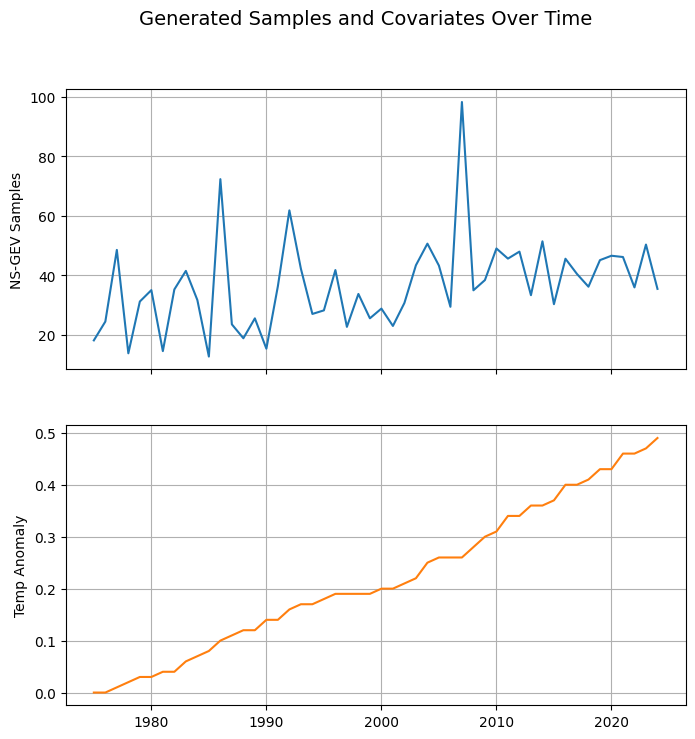

In [63]:
years = cov[0, :] + 1999

# Create 3 subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# Plot 1: Generated samples
axs[0].plot(years, rvs, color='tab:blue')
axs[0].set_ylabel('NS-GEV Samples')
axs[0].grid(True)

# Plot 2: Temperature anomaly
axs[1].plot(years, cov[1, :], color='tab:orange')
axs[1].set_ylabel('Temp Anomaly')
axs[1].grid(True)

# Set a common title
fig.suptitle('Generated Samples and Covariates Over Time', fontsize=14)
plt.show()
